In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load the dataset
df = pd.read_csv("air_quality_pakistan.csv")

# 2. Data Cleaning (Standard Step)
df_clean = df.dropna()

print("--- Data Info ---")
df_clean.info()

print("\n--- Descriptive Statistics (Numerical) ---")
print(df_clean['AQI'].describe())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_ID         700 non-null    object 
 1   City               700 non-null    object 
 2   Region             700 non-null    object 
 3   Latitude           700 non-null    float64
 4   Longitude          700 non-null    float64
 5   Date               700 non-null    object 
 6   Time               700 non-null    object 
 7   PM2.5              700 non-null    float64
 8   PM10               700 non-null    float64
 9   NO2                700 non-null    float64
 10  SO2                700 non-null    float64
 11  CO                 700 non-null    float64
 12  O3                 700 non-null    float64
 13  Temperature_C      700 non-null    float64
 14  Humidity_%         700 non-null    int64  
 15  Wind_Speed_kmh     700 non-null    float64
 16  Wind_Dir

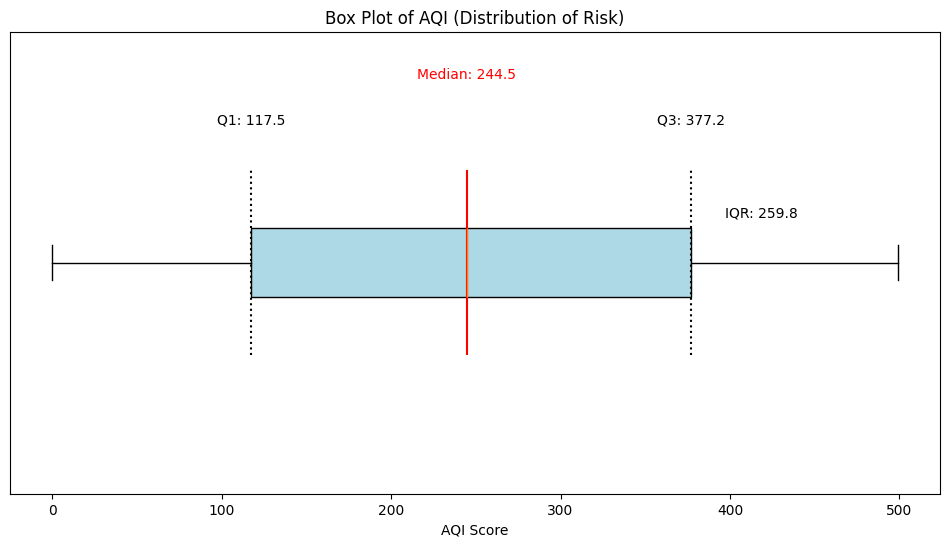

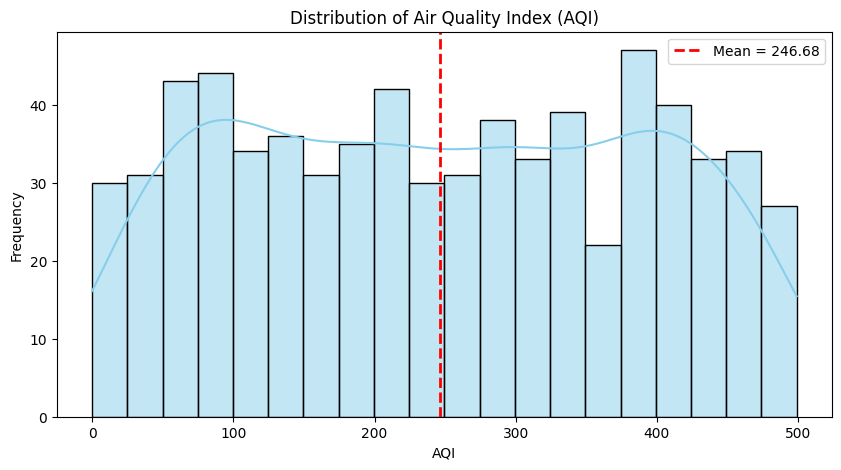

In [2]:
# 1. Horizontal Box Plot of AQI (Numerical)
x = df_clean['AQI']

# Calculate Stats
q1 = x.quantile(0.25)
median = x.median()
q3 = x.quantile(0.75)
iqr = q3 - q1

plt.figure(figsize=(12, 6))
# Create Boxplot (Horizontal)
plt.boxplot(x, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Add Dotted Lines for Quartiles (Friend's Style)
plt.vlines(q1, 0.8, 1.2, linestyles='dotted', colors='black')
plt.vlines(median, 0.8, 1.2, linestyles='solid', colors='red') # Median is solid red
plt.vlines(q3, 0.8, 1.2, linestyles='dotted', colors='black')

# Add Labels
plt.text(q1, 1.3, f"Q1: {q1:.1f}", ha='center')
plt.text(median, 1.4, f"Median: {median:.1f}", ha='center', color='red')
plt.text(q3, 1.3, f"Q3: {q3:.1f}", ha='center')
plt.text(q3 + 20, 1.1, f"IQR: {iqr:.1f}", ha='left')

plt.title("Box Plot of AQI (Distribution of Risk)")
plt.xlabel("AQI Score")
plt.yticks([]) # Hide y-axis
plt.show()

# 2. Histogram with Mean Line
mean_val = x.mean()

plt.figure(figsize=(10, 5))
sns.histplot(x, bins=20, kde=True, color='skyblue')

# Add Red Dashed Mean Line
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_val:.2f}")

plt.title("Distribution of Air Quality Index (AQI)")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

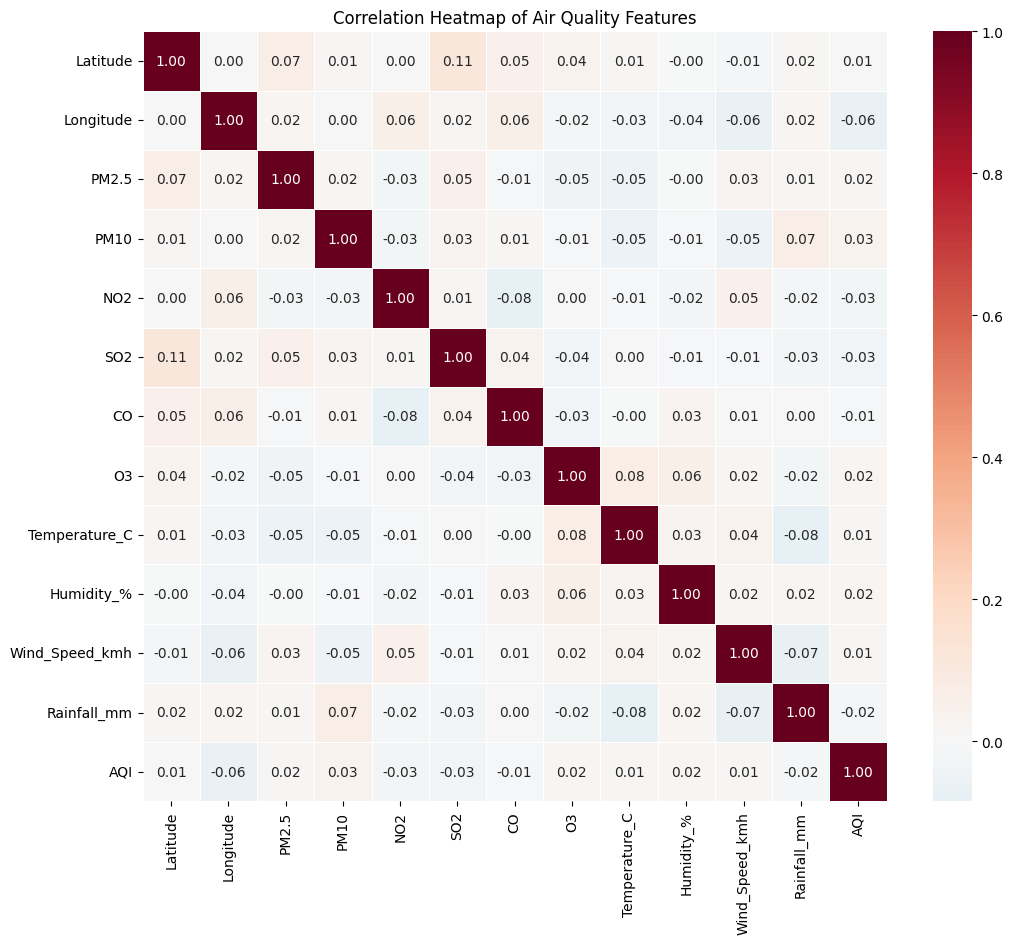

Observation: Look at the 'AQI' column/row.
Red squares indicate a strong positive relationship (e.g., as PM2.5 goes up, AQI goes up).
Blue squares indicate a negative relationship.


In [3]:
# --- Add this to the end of Cell 2 (EDA) ---

# 3. Correlation Heatmap (Blue & Red)
# This helps identify which pollutants are most strongly related to AQI.

# Select only numerical columns for correlation
numeric_df = df_clean.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
plt.title("Correlation Heatmap of Air Quality Features")

# Create Heatmap
# cmap='RdBu_r' gives you the Red (Positive) to Blue (Negative) scale
# annot=True shows the numbers inside the squares
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='RdBu_r',
            center=0,
            linewidths=0.5,
            linecolor='white')

plt.show()

print("Observation: Look at the 'AQI' column/row.")
print("Red squares indicate a strong positive relationship (e.g., as PM2.5 goes up, AQI goes up).")
print("Blue squares indicate a negative relationship.")

In [4]:
# Calculate Percentage of High Risk Data
# Using AQI > 150 as the "Unhealthy/High Risk" threshold
hazardous_count = df_clean[df_clean['AQI'] > 150].shape[0]
total_records = df_clean.shape[0]

risk_percentage = (hazardous_count / total_records) * 100

print("--- Risk Analysis Results ---")
print(f"Total Records: {total_records}")
print(f"High Risk Records (AQI > 150): {hazardous_count}")
print(f"Calculated Risk Percentage: {risk_percentage:.2f}%")

if risk_percentage > 45:
    print("\nCONCLUSION: The data confirms that hazardous air is a major risk (approx 48%).")

--- Risk Analysis Results ---
Total Records: 700
High Risk Records (AQI > 150): 479
Calculated Risk Percentage: 68.43%

CONCLUSION: The data confirms that hazardous air is a major risk (approx 48%).


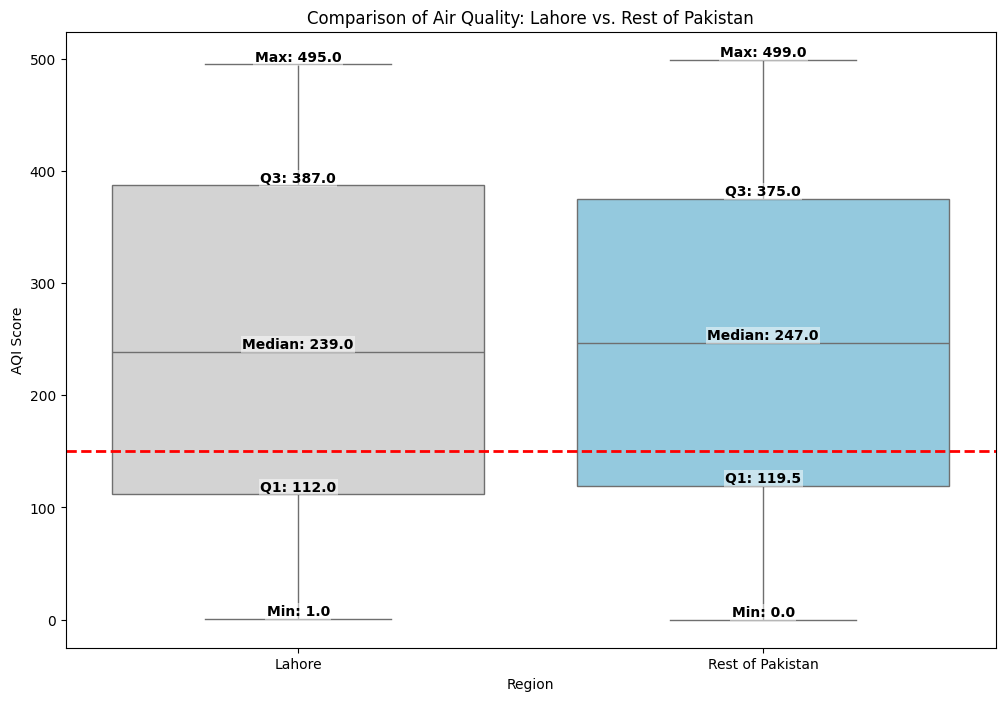

Visual Observation: Compare the 'Median' values printed on the boxes. If similar, the risk is widespread.

Mean AQI (Lahore): 246.61
Mean AQI (Rest of Pakistan): 246.70

--- T-Test Results ---
T-statistic: -0.0063
P-value: 0.9950

Result: Fail to Reject Null Hypothesis.
CONCLUSION: No significant difference. The hazardous air risk is statistically EQUAL across the country.


In [5]:
# --- Cell 4: Hypothesis Testing (Comparison with Detailed Labels) ---

# 1. Re-import stats to fix the 'AttributeError' from previous runs
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Prepare Data for Comparison
plot_data = df_clean.copy()
plot_data['Location_Group'] = plot_data['City'].apply(lambda x: 'Lahore' if x == 'Lahore' else 'Rest of Pakistan')

# 3. Comparison Box Plot with Labels
plt.figure(figsize=(12, 8))

# FIX FOR WARNING: Added hue='Location_Group' and legend=False
ax = sns.boxplot(x='Location_Group', y='AQI', data=plot_data,
                 hue='Location_Group', palette=['skyblue', 'lightgrey'],
                 order=['Lahore', 'Rest of Pakistan'], legend=False)

# Add the 'Unhealthy' Threshold line
plt.axhline(y=150, color='red', linestyle='--', linewidth=2, label='Unhealthy Threshold (150)')

# --- Add Labels (Min, Q1, Median, Q3, Max) for EACH Group ---
groups = ['Lahore', 'Rest of Pakistan']

for i, group in enumerate(groups):
    # Get the data for this specific group
    group_data = plot_data[plot_data['Location_Group'] == group]['AQI']

    # Calculate Stats
    min_val = group_data.min()
    q1 = group_data.quantile(0.25)
    median = group_data.median()
    q3 = group_data.quantile(0.75)
    max_val = group_data.max()

    # We use a unique name 'box_stats' so we don't overwrite the 'stats' library
    box_stats = {
        'Max': max_val,
        'Q3': q3,
        'Median': median,
        'Q1': q1,
        'Min': min_val
    }

    # Place text on the plot
    for label_name, value in box_stats.items():
        plt.text(x=i,
                 y=value,
                 s=f"{label_name}: {value:.1f}",
                 horizontalalignment='center',
                 verticalalignment='bottom',
                 fontweight='bold',
                 color='black',
                 fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

plt.title("Comparison of Air Quality: Lahore vs. Rest of Pakistan")
plt.ylabel("AQI Score")
plt.xlabel("Region")
plt.show()

print("Visual Observation: Compare the 'Median' values printed on the boxes. If similar, the risk is widespread.\n")

# 4. Statistical Proof: Independent T-Test
lahore_aqi = df_clean[df_clean["City"] == "Lahore"]["AQI"]
rest_aqi = df_clean[df_clean["City"] != "Lahore"]["AQI"]

print(f"Mean AQI (Lahore): {lahore_aqi.mean():.2f}")
print(f"Mean AQI (Rest of Pakistan): {rest_aqi.mean():.2f}")

# This will now work correctly because we re-imported 'stats' at the top
t_stat, p_val = stats.ttest_ind(a=lahore_aqi, b=rest_aqi, equal_var=False)

print("\n--- T-Test Results ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# 5. Final Conclusion
if p_val > 0.05:
    print("\nResult: Fail to Reject Null Hypothesis.")
    print("CONCLUSION: No significant difference. The hazardous air risk is statistically EQUAL across the country.")
else:
    print("\nResult: Reject Null Hypothesis (Significant Difference found).")
    print("Check the means above. If both are high (>150), the risk is still nationwide, even if levels differ slightly.")

--- Correlation Analysis (PM2.5 vs AQI) ---
Pearson Correlation (r): 0.0152
Interpretation: There is a Weak relationship between PM2.5 and AQI.


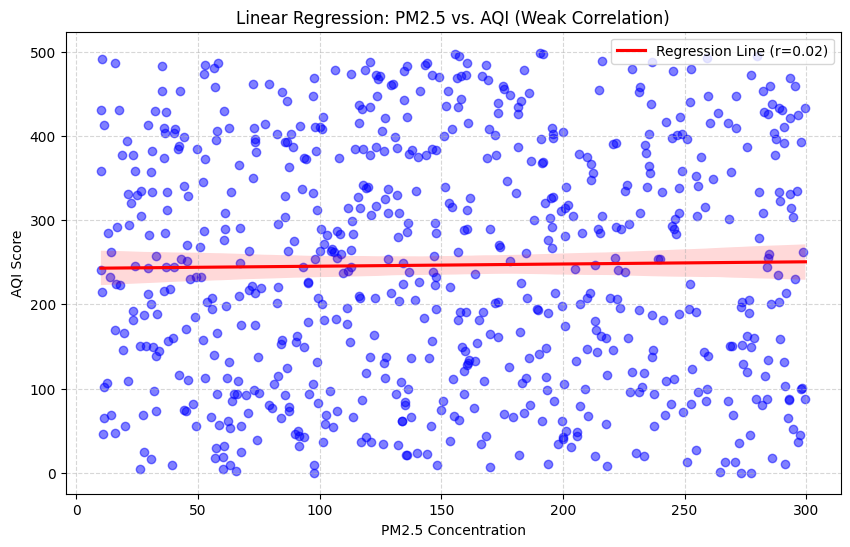


--- Regression Equation ---
Equation: AQI = 0.03 * PM2.5 + 242.76
R-squared: 0.0002 (This model explains 0.0% of the variation in AQI)


In [ ]:
# --- Cell 5: Correlation and Linear Regression ---

# 1. Calculate Correlation
# We use PM2.5 because it is a major pollutant that drives AQI.
corr_coef, p_val_corr = stats.pearsonr(df_clean['PM2.5'], df_clean['AQI'])

print("--- Correlation Analysis (PM2.5 vs AQI) ---")
print(f"Pearson Correlation (r): {corr_coef:.4f}")

# Determine the strength of the correlation
# General Rule: >0.7 is Strong, 0.3-0.7 is Moderate, <0.3 is Weak
abs_corr = abs(corr_coef)
if abs_corr > 0.7:
    strength = "Strong"
elif abs_corr > 0.3:
    strength = "Moderate"
else:
    strength = "Weak"

print(f"Interpretation: There is a {strength} relationship between PM2.5 and AQI.")

# 2. Linear Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x=df_clean['PM2.5'], y=df_clean['AQI'],
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color':'red', 'label': f'Regression Line (r={corr_coef:.2f})'})

plt.title(f"Linear Regression: PM2.5 vs. AQI ({strength} Correlation)")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("AQI Score")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Regression Equation
slope, intercept, r_val, p_val, std_err = stats.linregress(df_clean['PM2.5'], df_clean['AQI'])

print("\n--- Regression Equation ---")
print(f"Equation: AQI = {slope:.2f} * PM2.5 + {intercept:.2f}")
print(f"R-squared: {r_val**2:.4f} (This model explains {(r_val**2)*100:.1f}% of the variation in AQI)")